# PCA Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Ask Fenella and Andrew youngsMod NaNs (blank cells)

### fill with median or drop or something else

## FOR NOW: drop rows that have nan

In [19]:
initData = pd.read_csv("publisher_analysis_data.csv")
initData = initData.dropna()
initData['year'] = initData['year'].apply(lambda x: int(x.split('-')[0]))
initData['decade']=initData['year']//10*10
decade=initData['decade']
initData = initData.drop(columns = ['youngsMod','Unnamed: 0', 'sec_calcMass', 'sec_massRec','publisher','year','decade'])
print(initData.shape)
initData.head()

(930, 8)


,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,ph,sec_Mn,sec_Mw,sec_polyDisp
0,34.670,28.7790,0.051118,0.072340,5.065,44.1,127.6,2.890
1,12.710,9.7289,0.030050,0.023396,4.830,35.9,85.4,2.377
2,17.301,13.5850,0.034793,0.034683,5.207,20.1,93.4,4.653
3,25.879,21.3200,0.044734,0.057662,5.165,29.5,91.2,3.094
4,14.901,16.1320,0.047622,0.036076,6.405,76.8,161.6,2.105


In [27]:
decade.unique()

array([1840, 1850, 1860, 1870, 1880, 1890, 1920, 1990, 2010, 1900, 1910,
       1960, 2000, 1970], dtype=int64)

In [20]:
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])
initData_columnNames= initData.columns
scaleNormPipe = pipeline.fit_transform(initData)
pca_df = pd.DataFrame(data = scaleNormPipe, columns = initData_columnNames)
pca_df.head()

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,ph,sec_Mn,sec_Mw,sec_polyDisp
0,0.335523,0.301223,0.495272,0.236503,0.069218,0.609137,0.335819,-0.082755
1,-0.589839,-0.588227,-0.307333,-0.398571,-0.065347,0.119718,-0.039655,-0.180528
2,-0.495903,-0.504570,-0.206705,-0.320794,0.113733,-0.315226,0.001928,0.491474
3,-0.568506,-0.584839,0.396575,-0.138977,0.352706,-0.172857,-0.042634,0.045598
4,-0.335711,-0.220279,0.110132,-0.171891,0.404887,0.743088,0.231535,-0.165462


In [21]:
pca = PCA(n_components=3)

In [22]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "maxLoad"

X = initData.drop(target,1)
y = initData[target]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
pcaFitTransf=pca.fit_transform(scaleNormPipe)
y = pca_df.columns
pcaFitTransf

array([[ 1.03601084,  0.43331613,  0.21585955],
       [-0.70914342,  0.40509196,  0.36432715],
       [-0.5594785 , -0.33425448,  0.66598669],
       ...,
       [ 0.29792316, -0.43651837, -0.27215512],
       [ 0.96600963, -0.13897872,  0.0686372 ],
       [ 0.62014302, -0.75245446,  0.41572672]])

<ipython-input-39-acebfd167a2a>:6: UserWarning: Legend does not support 1840 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(decade,'decade')


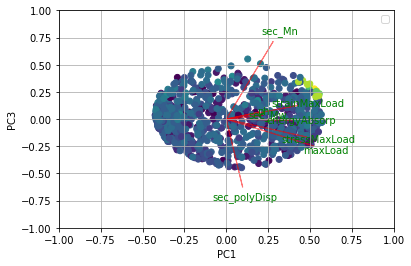

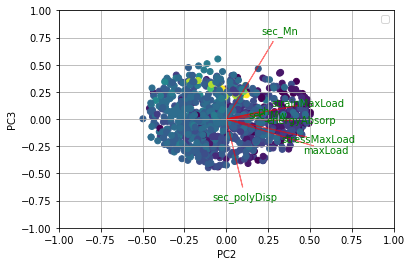

In [ ]:
def myplot(xs,ys,L1,L2,coeff,labels=None):
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = decade)
    plt.legend(decade,'decade')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(L1))
    plt.ylabel("PC{}".format(L2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcaFitTransf[:,0],pcaFitTransf[:,2],1,3,np.transpose(pca.components_[0:2, :]), list(y))
plt.show()
myplot(pcaFitTransf[:,1],pcaFitTransf[:,2],2,3,np.transpose(pca.components_[0:2, :]), list(y))
plt.show()
myplot(pcaFitTransf[:,0],pcaFitTransf[:,1],1,2,np.transpose(pca.components_[0:2, :]), list(y))
plt.show()